Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...


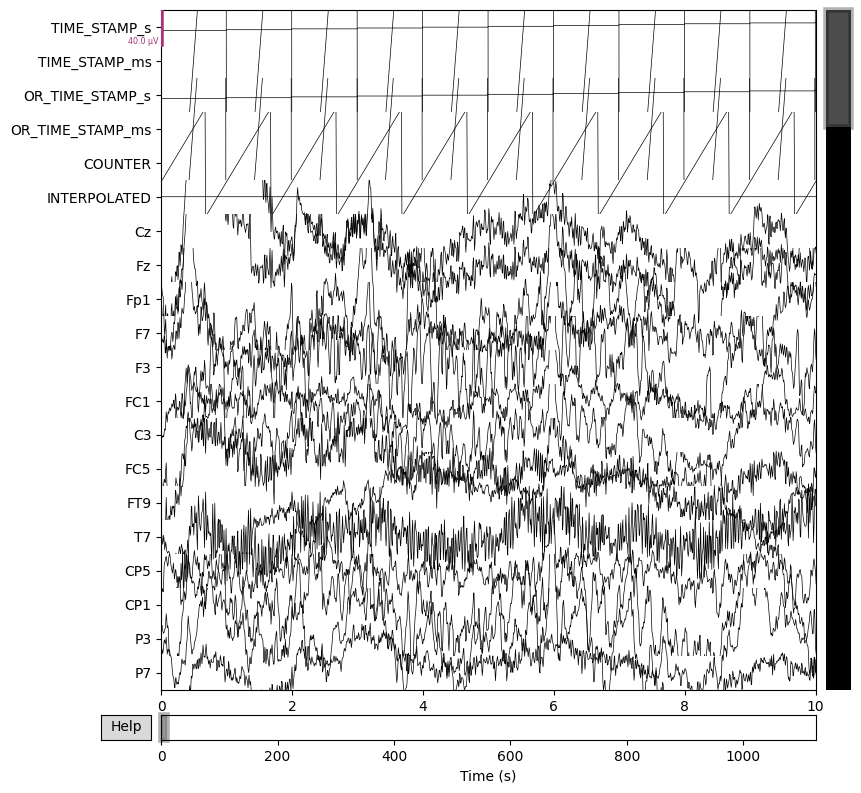

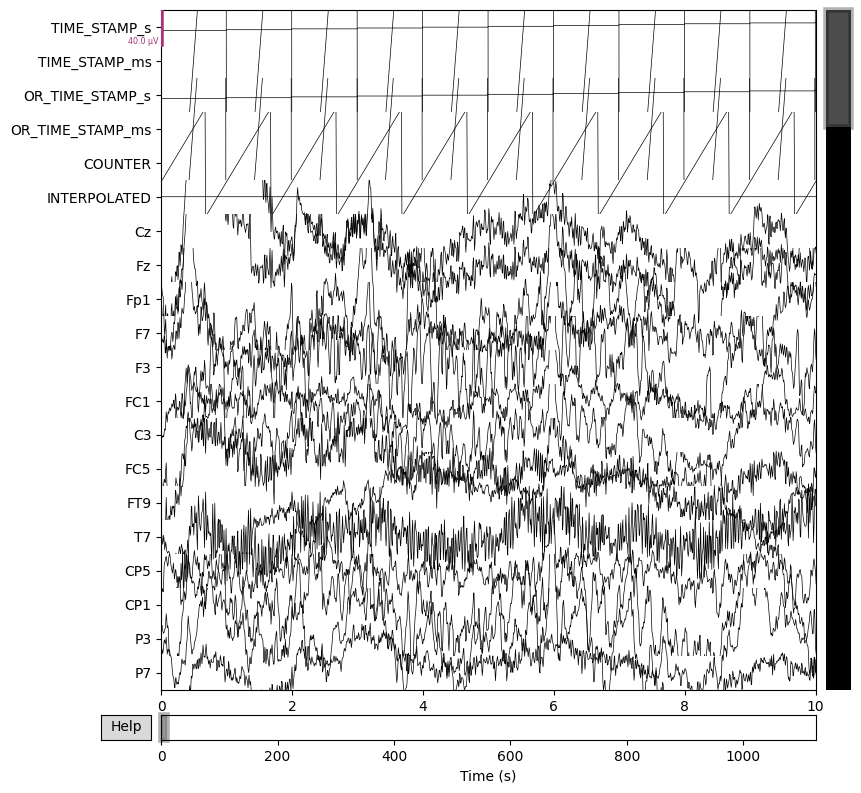

In [17]:
import mne

raw = mne.io.read_raw_edf('1.edf', preload=True)
raw.plot() 


## DO NOT run this file without the CSV in it's place because you will erase the notebook output

Creating RawArray with float64 data, n_channels=32, n_times=144046
    Range : 0 ... 144045 =      0.000 ...  1125.352 secs
Ready.


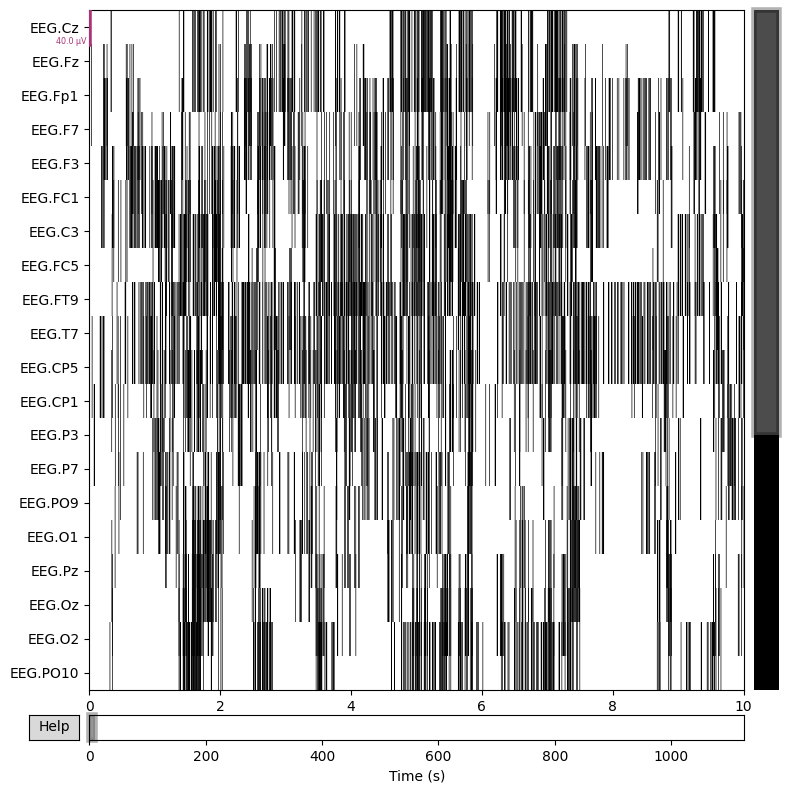

In [10]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

# Load
csv_file = r'T:\GITHUB\DATA_ANALYSIS_TOOLS\103918_2024-04-17T100524.975995_EPOCFLEX_182887_2024.04.17T10.05.24.04.00.md.bpemotiv.csv'
df = pd.read_csv(csv_file, skiprows=[0]) # Do not skip first row since we want headers in this way to transpose

# Define EEG columns
eeg_channels = [
    'EEG.Cz', 'EEG.Fz', 'EEG.Fp1', 'EEG.F7', 'EEG.F3', 'EEG.FC1', 'EEG.C3', 'EEG.FC5',
    'EEG.FT9', 'EEG.T7', 'EEG.CP5', 'EEG.CP1', 'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1',
    'EEG.Pz', 'EEG.Oz', 'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6',
    'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 'EEG.F8', 'EEG.Fp2'
]

# Extract data
eeg_data = df[eeg_channels].values.T  # Transpose to shape (n_channels, n_times)

# Define info
sfreq = 128  # Hz
ch_names = eeg_channels  # List of channel names
ch_types = ['eeg'] * len(ch_names)  # All channels are  'eeg'

# Create class instance
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
# Check for NaN values
if np.isnan(eeg_data).any():
    print("Data contains NaN values. Handling NaNs by interpolation.")
    # Handle NaNs (e.g., interpolate or fill with zeros)
    eeg_data = pd.DataFrame(eeg_data).interpolate(method='linear', axis=1).values
    eeg_data = np.nan_to_num(eeg_data)  # Replace remaining NaNs with 0

# Create RawArray obj
raw = mne.io.RawArray(eeg_data, info)

# Plot data
raw.plot()

# Needed to keep window open
plt.show()


## DO NOT run this file without the CSV in it's place because you will erase the notebook output

First few rows of the dataframe:
    Timestamp  OriginalTimestamp  EEG.Counter  EEG.Interpolated     EEG.Cz  \
0  1713362725         1713362725           41                 0 -41.736206   
1  1713362725         1713362725           42                 0 -34.522160   
2  1713362725         1713362725           43                 0 -42.684563   
3  1713362725         1713362725           44                 0 -51.863415   
4  1713362725         1713362725           45                 0 -53.348476   

      EEG.Fz    EEG.Fp1     EEG.F7     EEG.F3    EEG.FC1  ...  POW.F8.Theta  \
0 -32.683178  30.736187 -17.353048 -52.292267 -51.903748  ...           NaN   
1 -27.527418  36.340836 -18.872620 -46.604588 -45.704151  ...           NaN   
2 -38.770660  29.644495 -26.026054 -60.902599 -47.707676  ...           NaN   
3 -50.002659  25.004082 -23.950798 -72.624771 -49.196892  ...           NaN   
4 -44.317272  23.954462 -24.439154 -60.769073 -47.098465  ...           NaN   

   POW.F8.Alpha  POW.F8

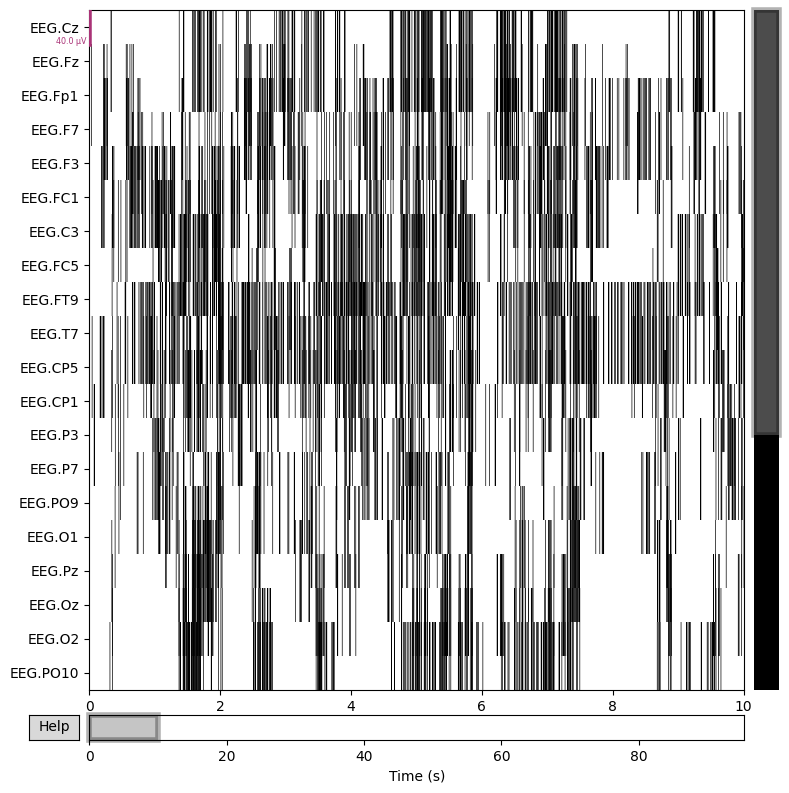

In [11]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file = '103918/split/103918.From_Baseline_to_videos_1_excited_1_motorsports_kenMiles.mp4_0-12208.csv'
df = pd.read_csv(csv_file, skiprows=[0])

# Print the first few rows to verify data loading
print("First few rows of the dataframe:")
print(df.head())

# Print column headers
print("Column headers:")
print(df.columns)

# Define EEG channel columns
eeg_channels = [
    'EEG.Cz', 'EEG.Fz', 'EEG.Fp1', 'EEG.F7', 'EEG.F3', 'EEG.FC1', 'EEG.C3', 'EEG.FC5',
    'EEG.FT9', 'EEG.T7', 'EEG.CP5', 'EEG.CP1', 'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1',
    'EEG.Pz', 'EEG.Oz', 'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6',
    'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 'EEG.F8', 'EEG.Fp2'
]

# Extract the EEG data
eeg_data = df[eeg_channels].values.T  # Transpose to shape (n_channels, n_times)

# Check the shape of the extracted data
print("Shape of the EEG data array (n_channels, n_times):")
print(eeg_data.shape)

# Inspect the first few rows of EEG data
print("First few rows of the EEG data:")
print(eeg_data[:, :5])

# Check for NaN values
if np.isnan(eeg_data).any():
    print("Data contains NaN values. Handling NaNs by interpolation.")
    # Handle NaNs (e.g., interpolate or fill with zeros)
    eeg_data = pd.DataFrame(eeg_data).interpolate(method='linear', axis=1).values
    eeg_data = np.nan_to_num(eeg_data)  # Replace remaining NaNs with 0

# Re-check for NaN values
print("Any NaN values after handling NaNs:")
print(np.isnan(eeg_data).any())

# Define the metadata
sfreq = 128  # Sampling frequency (Hz)
ch_names = eeg_channels  # List of channel names
ch_types = ['eeg'] * len(ch_names)  # All channels are of type 'eeg'

# Create an MNE Info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create the RawArray object
raw = mne.io.RawArray(eeg_data, info)

# Plot the raw data
raw.plot()

# Keep the plot window open in standalone scripts
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:7: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display
C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display
C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:7: UserWarning: Infinite value in PSD for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:11: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:11: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
C:\Users\micha\AppData\Local\Temp\ipykernel_10252\1143309981.py:11: UserWarning: Infinite value in PSD for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz,

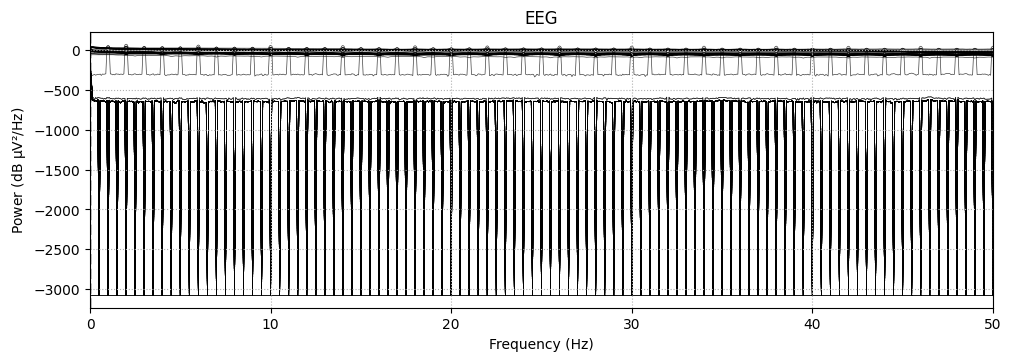

In [2]:
import mne

edf_file = '1.edf'

raw = mne.io.read_raw_edf(edf_file, preload=True)

raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display

import matplotlib.pyplot as plt

fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
fig.savefig('psd_plot.png')  # Save the figure
plt.close(fig)  # Close the plot to free memory


In [19]:
import mne
import matplotlib.pyplot as plt

# Replace 'your_file.edf' with the path to your EDF file
edf_file = '1.edf'

# Load the EDF file
raw = mne.io.read_raw_edf(edf_file, preload=True)

# Pick only channels that contain 'EEG' in their names
eeg_channels = [ch for ch in raw.ch_names if 'EEG' in ch]
raw.pick_channels(eeg_channels)

# Print the names of the selected EEG channels
print("Selected EEG channels:")
print(eeg_channels)

# Plot the PSD
raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display


fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
fig.savefig('psd_plot.png')  # Save the figure
plt.close(fig)  # Close the plot to free memory


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected EEG channels:
[]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:19: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display
C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:19: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)  # Adjust fmax to set the maximum frequency to display
C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:19: UserWarning: Infinite value in PSD for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz,

Plotting power spectral density (dB=True).


C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:22: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:22: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = raw.plot_psd(fmax=50, show=False)  # Compute PSD without displaying
C:\Users\micha\AppData\Local\Temp\ipykernel_760\2373809907.py:22: UserWarning: Infinite value in PSD for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz

In [21]:
import mne
import matplotlib.pyplot as plt

# Replace '1.edf' with the path to your EDF file
edf_file = '2.edf'

# Load the EDF file
raw = mne.io.read_raw_edf(edf_file, preload=True)

# Pick only EEG channels
raw.pick_types(eeg=True)

# Print the names of the selected EEG channels
print("Selected EEG channels:")
print(raw.ch_names)

# Compute and plot the PSD using the updated method
psd = raw.compute_psd(fmax=50)  # Compute PSD up to 50 Hz
psd.plot()

# If you want to save the PSD plot to a file, you can use:
fig = psd.plot(show=False)  # Compute PSD without displaying
fig.savefig('psd_plot.png')  # Save the figure
plt.close(fig)  # Close the plot to free memory


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Selected EEG channels:
['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2', 'HighBitFlex', 'SaturationFlag', 'RawCq', 'Battery', 'BatteryPercent', 'MarkerHardware', 'CQ.Cz', 'CQ.Fz', 'CQ.Fp1', 'CQ.F7', 'CQ.F3', 'CQ.FC1', 'CQ.C3', 'CQ.FC5', 'CQ.FT9', 'CQ.T7', 'CQ.CP5', 'CQ.CP1', 'CQ.P3', 'CQ.P7', 'CQ.PO9', 'CQ.O1', 'CQ.Pz', 'CQ.Oz', 'CQ.O2', 'CQ.PO10', 'CQ.P8', 'CQ.P4', 'CQ.CP2', 'CQ.CP6', 'CQ.T8', 'CQ.FT10', 'CQ.FC6', 'CQ.C4', 'CQ.FC2', 'CQ.F4', 'CQ.F8', 'CQ.Fp2',

C:\Users\micha\AppData\Local\Temp\ipykernel_760\1675043549.py:18: UserWarning: Zero value in spectrum for channels SaturationFlag, Battery, BatteryPercent, MarkerHardware, CQ.Cz, CQ.Fz, CQ.Fp1, CQ.F7, CQ.F3, CQ.FC1, CQ.C3, CQ.FC5, CQ.FT9, CQ.T7, CQ.CP5, CQ.CP1, CQ.P3, CQ.P7, CQ.PO9, CQ.O1, CQ.Pz, CQ.Oz, CQ.O2, CQ.PO10, CQ.P8, CQ.P4, CQ.CP2, CQ.CP6, CQ.T8, CQ.FT10, CQ.FC6, CQ.C4, CQ.FC2, CQ.F4, CQ.F8, CQ.Fp2, CQ.Overall
  psd = raw.compute_psd(fmax=50)  # Compute PSD up to 50 Hz
C:\Users\micha\AppData\Local\Temp\ipykernel_760\1675043549.py:19: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  psd.plot()
C:\Users\micha\AppData\Local\Temp\ipykernel_760\1675043549.py:19: UserWarning: Infinite value in PSD for channels SaturationFlag, Battery, BatteryPercent, MarkerHardware, CQ.Cz, CQ.Fz, CQ.Fp1, CQ.F7, CQ.F3, CQ.FC1, CQ.C3, CQ.FC5, CQ.FT9, CQ.T7, CQ.CP5, CQ.CP1, CQ.P3, CQ.P7, CQ.PO9, CQ.O1, CQ.Pz, CQ.Oz, CQ.O2, CQ.

In [29]:
import mne

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Adjust parameters
fmin, fmax = 2, 64  # Maximum frequency adjusted for Emotiv headset
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD
psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)

# Print the result
print(psd_result)


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 16.000 (s)
<Power Spectrum (from Raw, welch method) | 116 channels × 993 freqs, 2.0-64.0 Hz>


C:\Users\micha\AppData\Local\Temp\ipykernel_760\4066267748.py:11: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 16.000 (s)


C:\Users\micha\AppData\Local\Temp\ipykernel_760\3864350061.py:13: UserWarning: Zero value in spectrum for channels SaturationFlag, BATTERY, BATTERY_PERCENT, MarkerValueInt, MARKER_HARDWARE, CQ_Cz, CQ_Fz, CQ_Fp1, CQ_F7, CQ_F3, CQ_FC1, CQ_C3, CQ_FC5, CQ_FT9, CQ_T7, CQ_CP5, CQ_CP1, CQ_P3, CQ_P7, CQ_PO9, CQ_O1, CQ_Pz, CQ_Oz, CQ_O2, CQ_PO10, CQ_P8, CQ_P4, CQ_CP2, CQ_CP6, CQ_T8, CQ_FT10, CQ_FC6, CQ_C4, CQ_FC2, CQ_F4, CQ_F8, CQ_Fp2, CQ_Overall, CQ_CMS, CQ_DRL
  psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_760\3864350061.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting


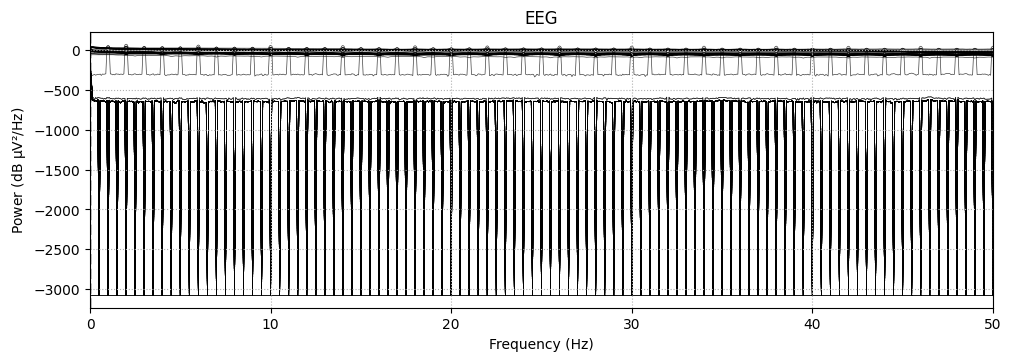

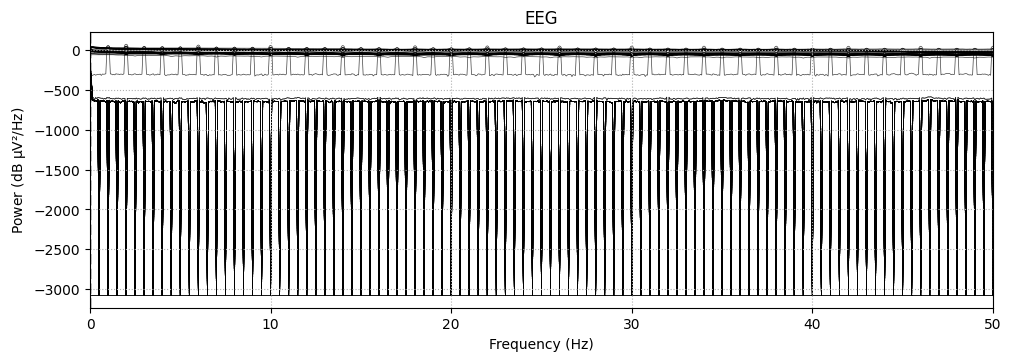

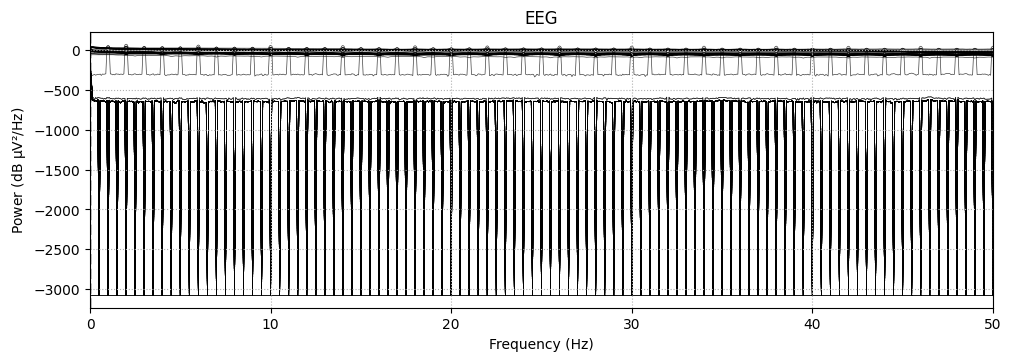

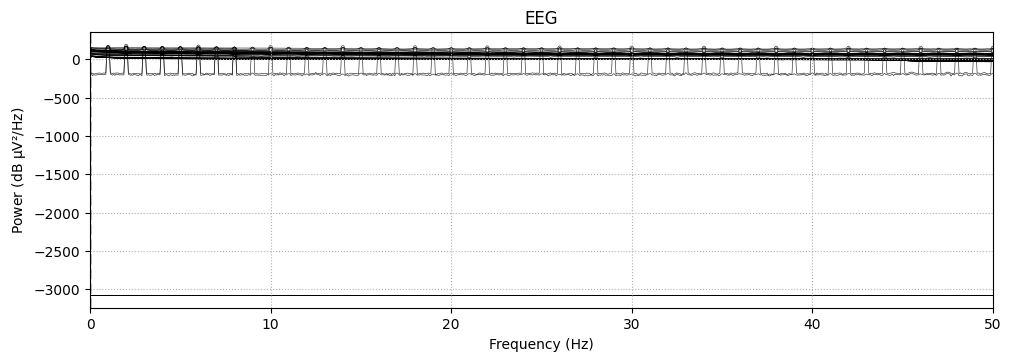

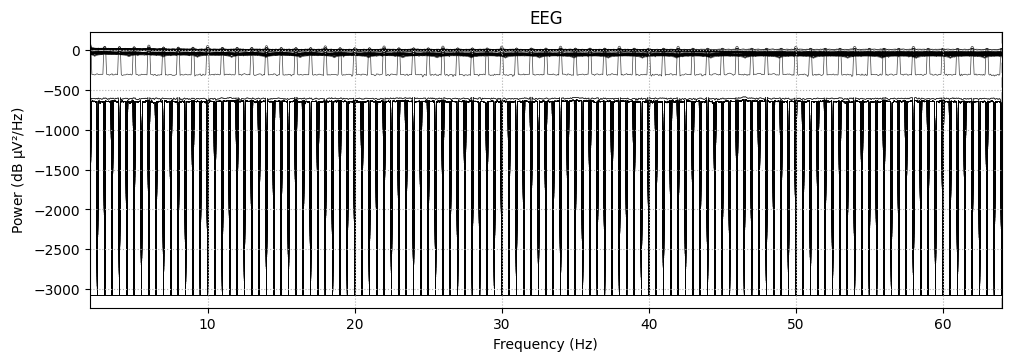

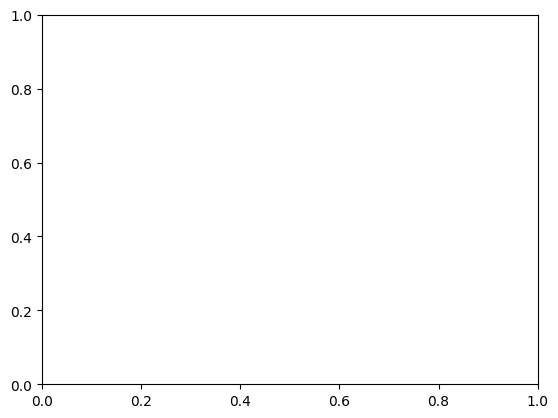

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

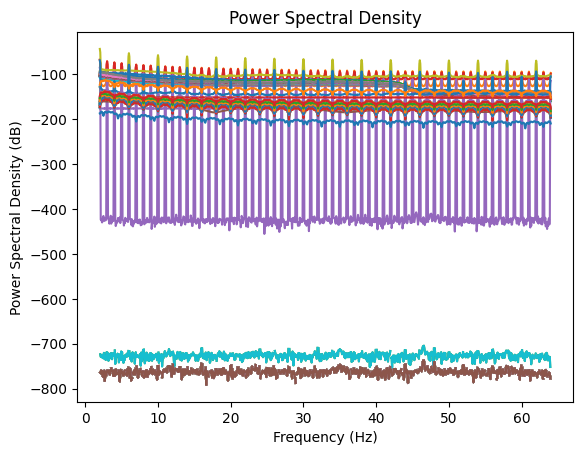

In [30]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Adjust parameters
fmin, fmax = 2, 64  # Maximum frequency adjusted for Emotiv headset
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD
psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density')
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 4.000 (s)


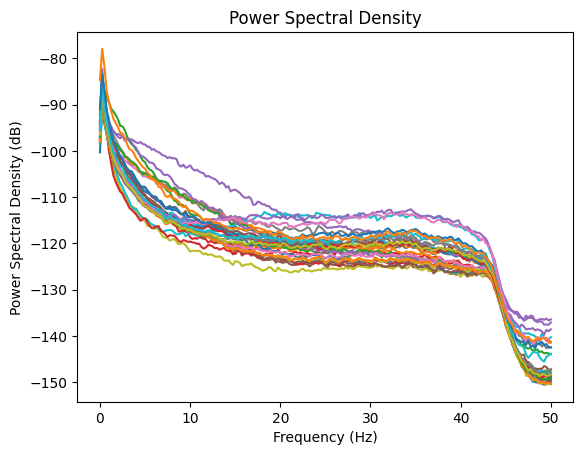

In [6]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read the EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels for the Emotiv headset
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 
                'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 0, 50  # Maximum frequency adjusted for Emotiv headset
n_fft = 2**9  # FFT size (n_fft), ideally a power of 2

# Compute PSD
psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, picks=eeg_channels, n_jobs=1)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density')
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 4.000 (s)


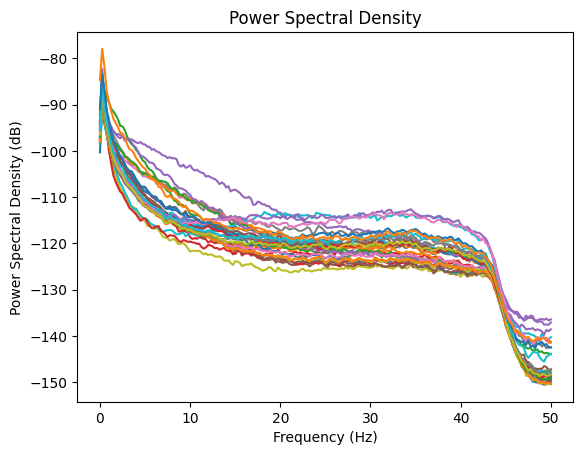

In [55]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 0, 50  # Maximum frequency adjusted for Emotiv headset
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD
psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, picks=eeg_channels, n_jobs=1)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density')
plt.show()


In [1]:
fmin, fmax = 0, 64
psd_result_mt = raw.compute_psd(fmin=fmin, fmax=fmax, tmin=None, tmax=None, picks=eeg_channels, method='multitaper', n_jobs=1)
psds_mt, freqs_mt = psd_result_mt.data, psd_result_mt.freqs

plt.figure()
plt.plot(freqs_mt, 10 * np.log10(psds_mt.T))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density (Multi-taper)')
plt.show()
plt.close()

NameError: name 'raw' is not defined

Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 4.000 (s)


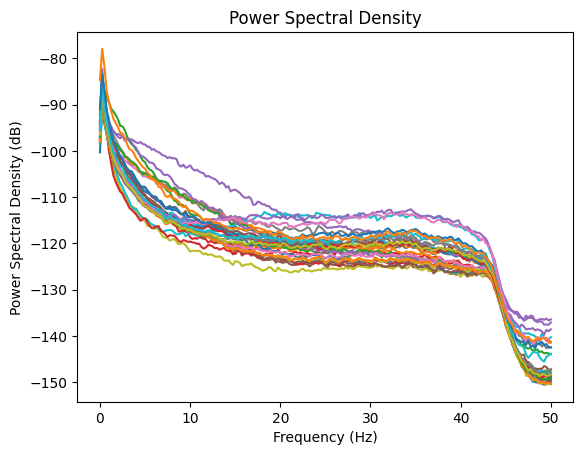

In [68]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 0, 50  # Maximum frequency adjusted for Emotiv headset, must be nyquist or lower (64)
n_fft = 2**9  # the FFT size (n_fft). Ideally a pow of 2

# Compute PSD
psd_result = raw.compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, picks=eeg_channels, n_jobs=1)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density')
plt.show()

Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 10.008 (s)


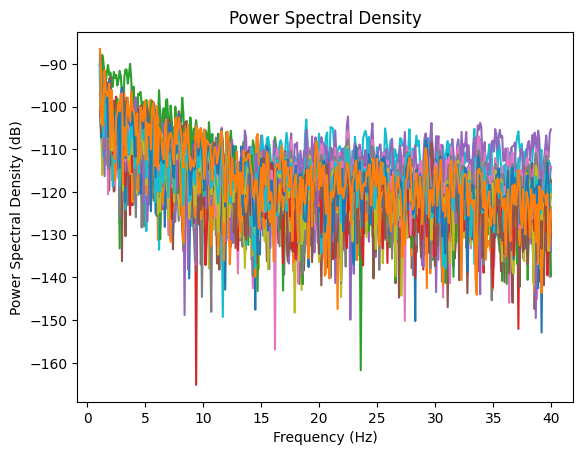

In [66]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 1, 40  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD using multitaper method
psd_result = raw.compute_psd( tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psds.T))  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density')
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
    Using multitaper spectrum estimation with 7 DPSS windows


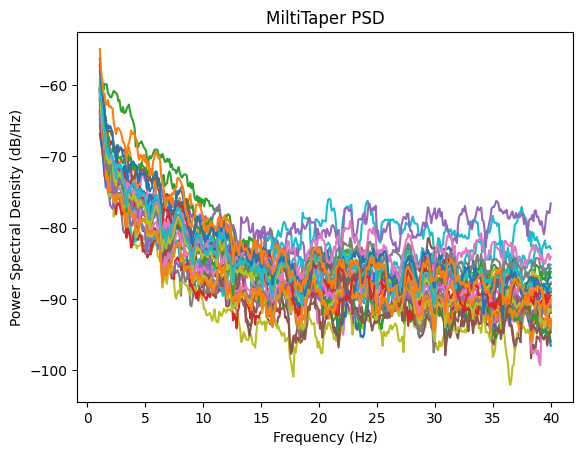

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

fmin, fmax = 1, 40  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**11  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD using multitaper method
psd_result = raw.compute_psd(method='multitaper', tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Calculate frequency bin width
delta_f = freqs[1] - freqs[0]

# Normalize PSD by frequency bin width and convert to dB/Hz
psds_dbhz = 10 * np.log10(psds / delta_f)

# Plot PSD
plt.figure()
plt.plot(freqs, psds_dbhz.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('MiltiTaper PSD')
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
    Using multitaper spectrum estimation with 7 DPSS windows


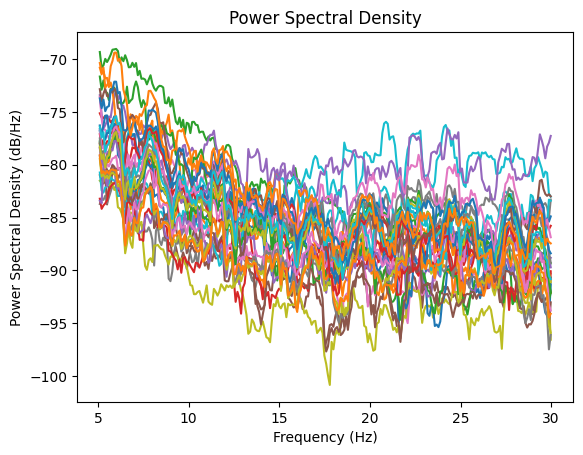

In [69]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 5, 30  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD using multitaper method
psd_result = raw.compute_psd(method='multitaper', tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Calculate frequency bin width
delta_f = freqs[1] - freqs[0]

# Normalize PSD by frequency bin width and convert to dB/Hz
psds_dbhz = 10 * np.log10(psds / delta_f)

# Plot PSD
plt.figure()
plt.plot(freqs, psds_dbhz.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density')
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
    Using multitaper spectrum estimation with 7 DPSS windows


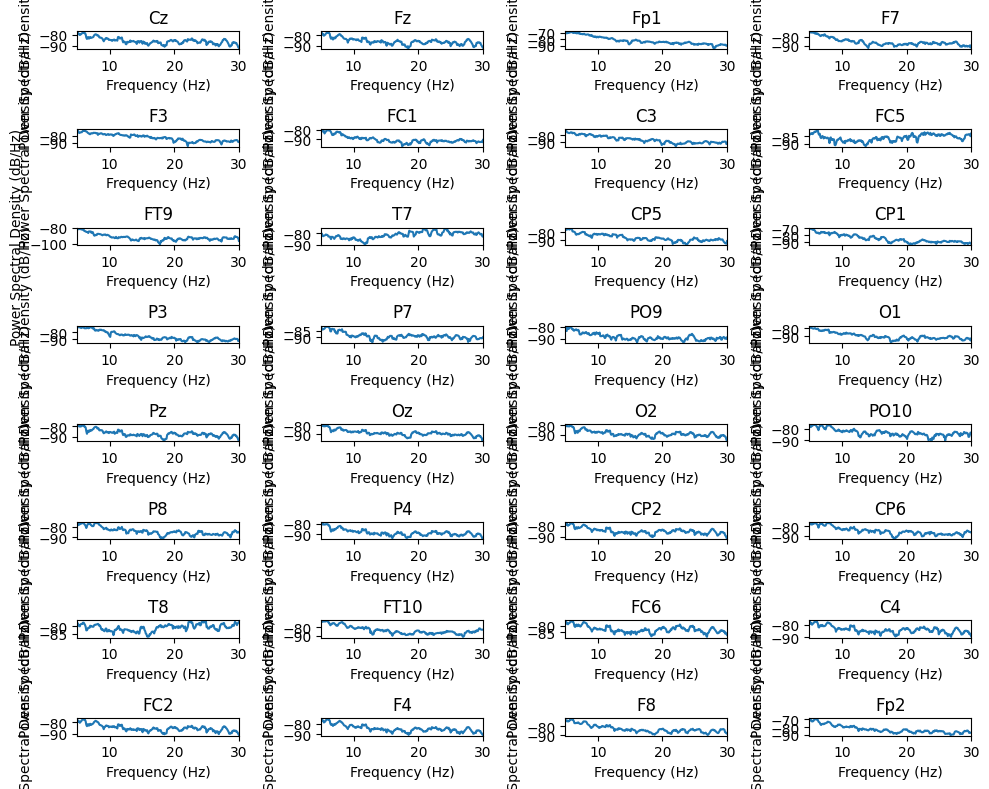

In [70]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 5, 30  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Compute PSD using multitaper method for all EEG channels
psd_result = raw.compute_psd(method='multitaper', tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)

# Extract PSD and frequencies
psds, freqs = psd_result.data, psd_result.freqs

# Calculate frequency bin width
delta_f = freqs[1] - freqs[0]

# Normalize PSD by frequency bin width and convert to dB/Hz
psds_dbhz = 10 * np.log10(psds / delta_f)

# Plot PSD for each EEG channel
plt.figure(figsize=(10, 8))
for i, channel in enumerate(eeg_channels):
    plt.subplot(8, 4, i+1)
    plt.plot(freqs, psds_dbhz[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title(channel)
    plt.xlim(fmin, fmax)  # limit x-axis to frequency range of interest
plt.tight_layout()
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 10.008 (s)


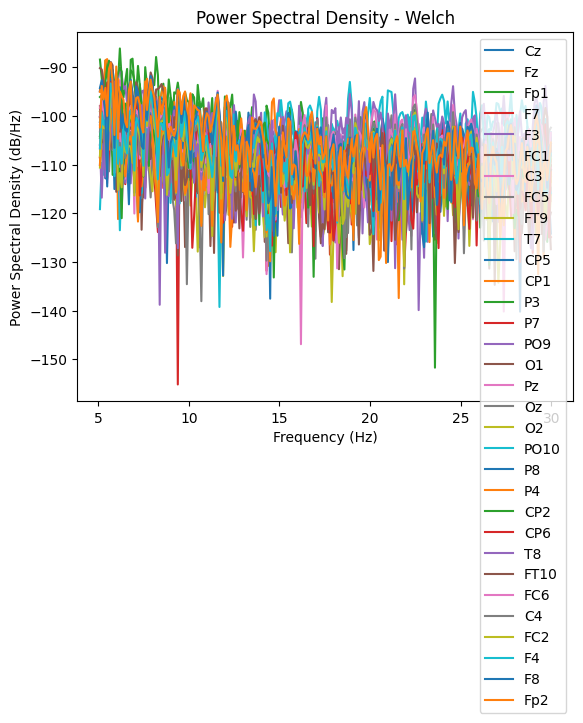

    Using multitaper spectrum estimation with 7 DPSS windows


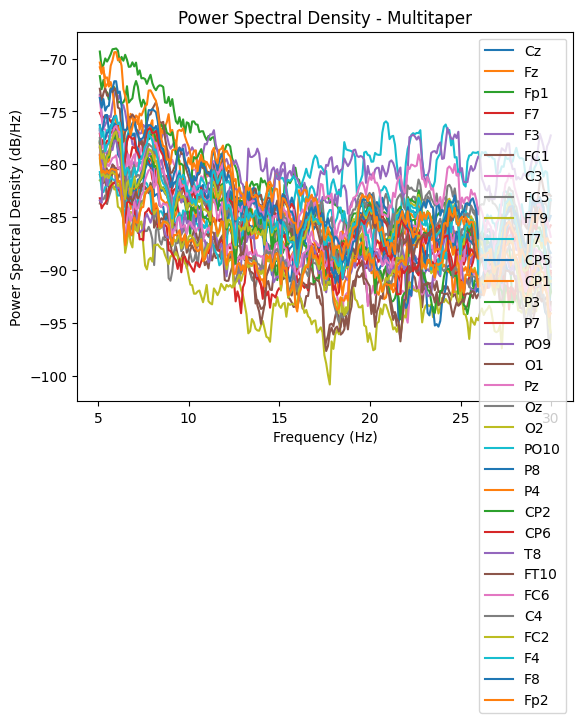

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 5, 30  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Define PSD methods
psd_methods = ['welch', 'multitaper']  # Add more methods as needed

# Plot PSD for each method
for method in psd_methods:
    # Compute PSD using the specified method for all EEG channels
    psd_result = raw.compute_psd(method=method, tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)
    
    # Extract PSD and frequencies
    psds, freqs = psd_result.data, psd_result.freqs
    
    # Calculate frequency bin width
    delta_f = freqs[1] - freqs[0]
    
    # Normalize PSD by frequency bin width and convert to dB/Hz
    psds_dbhz = 10 * np.log10(psds / delta_f)
    
    # Plot PSD for the current method
    plt.figure()
    for i, channel in enumerate(eeg_channels):
        plt.plot(freqs, psds_dbhz[i], label=channel)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('Power Spectral Density - ' + method.capitalize())
    plt.legend(loc='upper right')
    plt.show()


In [3]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Effective window size : 10.008 (s)


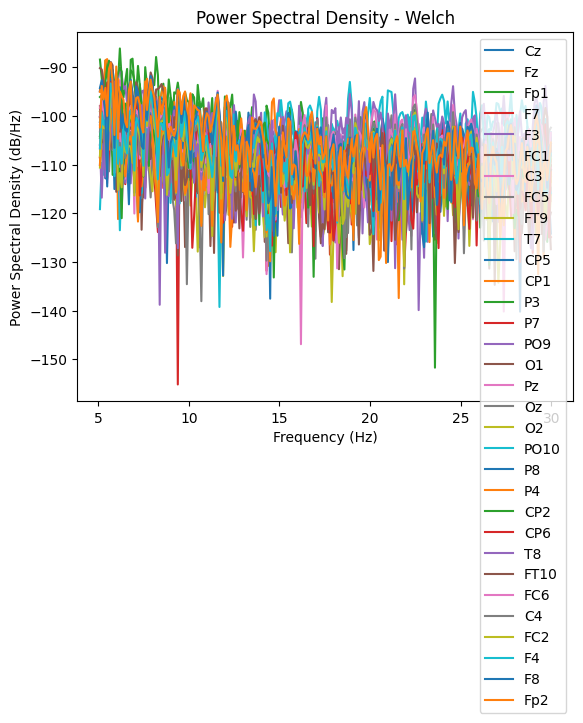

    Using multitaper spectrum estimation with 7 DPSS windows


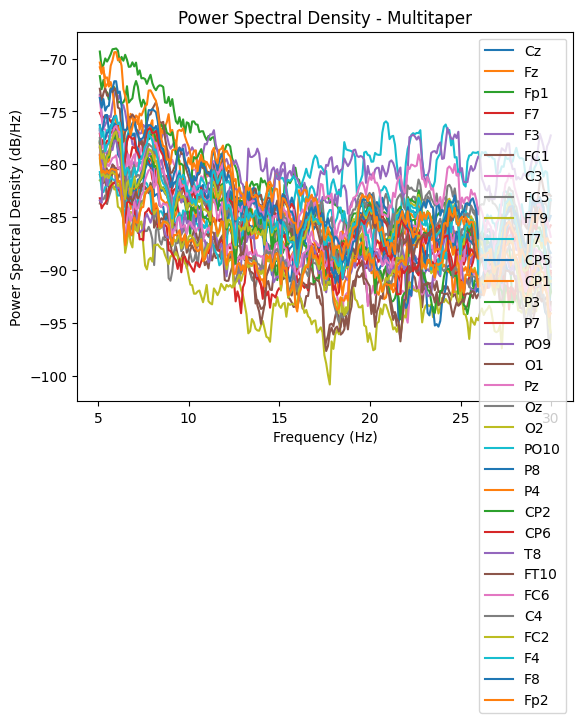

Effective window size : 10.008 (s)
converting legacy list-of-tuples input to a dict for the `bands` parameter


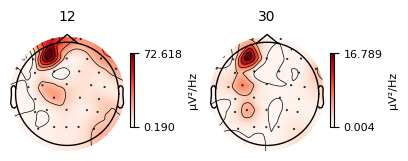

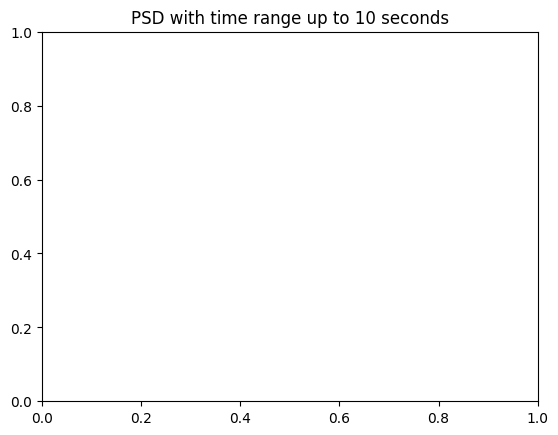

In [5]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 5, 30  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Define PSD methods
psd_methods = ['welch', 'multitaper']  # Add more methods as needed

# Set up the 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage for the raw data, ignoring missing channels
raw.set_montage(montage, on_missing='ignore')

# Plot PSD for each method
for method in psd_methods:
    # Compute PSD using the specified method for selected EEG channels
    psd_result = raw.compute_psd(method=method, tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, remove_dc=True, picks=eeg_channels)
    
    # Extract PSD and frequencies
    psds, freqs = psd_result.data, psd_result.freqs
    
    # Calculate frequency bin width
    delta_f = freqs[1] - freqs[0]
    
    # Normalize PSD by frequency bin width and convert to dB/Hz
    psds_dbhz = 10 * np.log10(psds / delta_f)
    
    # Plot PSD for the current method
    plt.figure()
    for i, channel in enumerate(eeg_channels):
        plt.plot(freqs, psds_dbhz[i], label=channel)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('Power Spectral Density - ' + method.capitalize())
    plt.legend(loc='upper right')
    plt.show()

# Plot topomap for PSD using specific time range (Welch method)
tmax = 10
psd_result = raw.compute_psd(tmax=tmax, picks=eeg_channels)
psd_result.plot_topomap(bands=[(8, 12), (13, 30)], ch_type='eeg')
plt.title('PSD with time range up to {} seconds'.format(tmax))
plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...


Duration of the recording: 1124.9921875 seconds
EEG Channels: ['TIME_STAMP_s', 'TIME_STAMP_ms', 'OR_TIME_STAMP_s', 'OR_TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2', 'HighBitFlex', 'SaturationFlag', 'RAW_CQ', 'BATTERY', 'BATTERY_PERCENT', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_Cz', 'CQ_Fz', 'CQ_Fp1', 'CQ_F7', 'CQ_F3', 'CQ_FC1', 'CQ_C3', 'CQ_FC5', 'CQ_FT9', 'CQ_T7', 'CQ_CP5', 'CQ_CP1', 'CQ_P3', 'CQ_P7', 'CQ_PO9', 'CQ_O1', 'CQ_Pz', 'CQ_Oz', 'CQ_O2', 'CQ_PO10', 'CQ_P8', 'CQ_P4', 'CQ_CP2', 'CQ_CP6', 'CQ_T8', 'CQ_FT10', 'CQ_FC6', 'CQ_C4', 'CQ_FC2', 'CQ_F4', 'CQ_F8', 'CQ_Fp2', 'CQ_Overall', 'EQ_SampleRateQua', 'EQ_OVERALL', 'EQ_Cz', 'EQ_Fz', 'EQ_Fp1', 'EQ_F7', 'EQ_F3', 'EQ_FC1', 'EQ_C3', 'EQ_FC5', 'EQ_FT9', 'EQ_T7', 'EQ_CP5', 'EQ_CP1', 'EQ_P3', 'EQ_P7', 'EQ_PO9

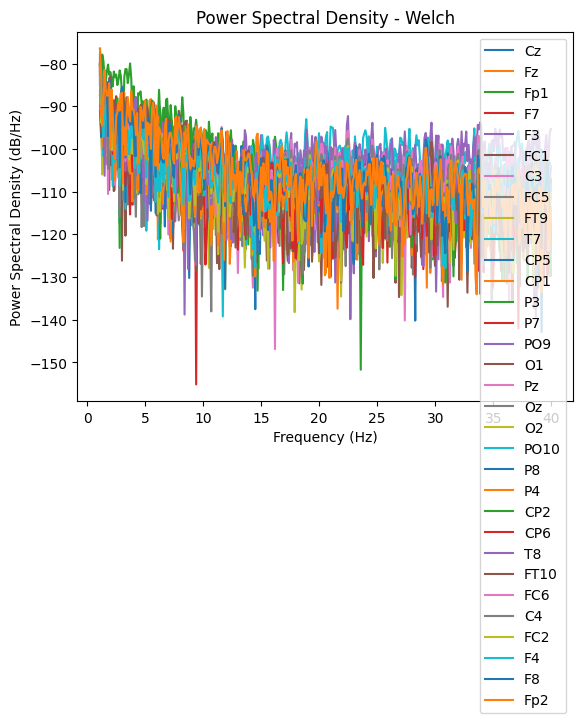

    Using multitaper spectrum estimation with 7 DPSS windows


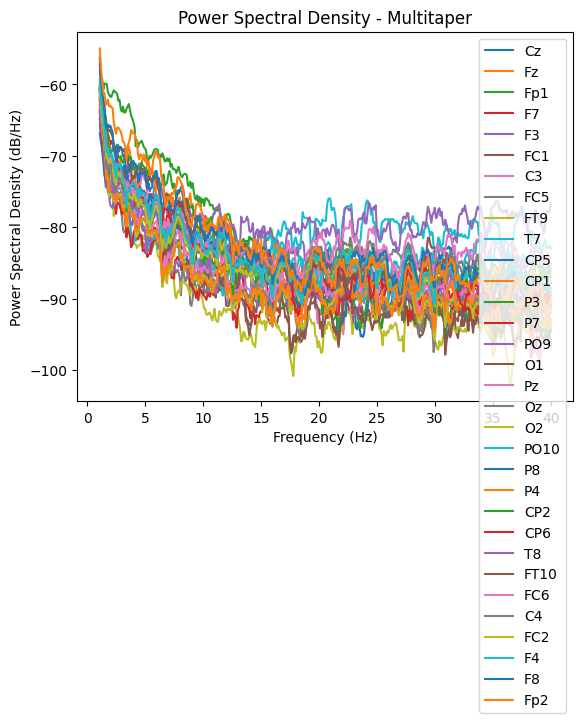

Effective window size : 16.000 (s)
converting legacy list-of-tuples input to a dict for the `bands` parameter


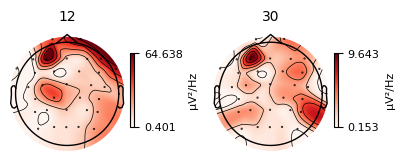

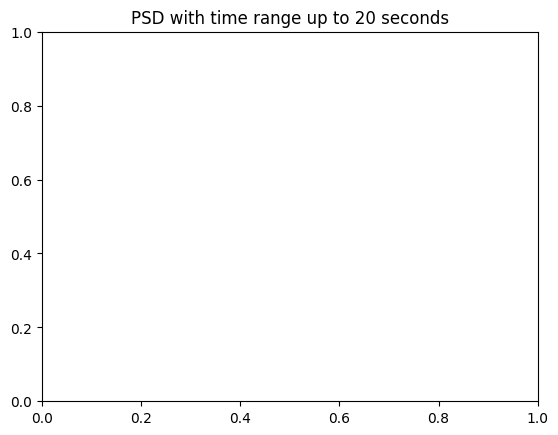

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 1, 40  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Define PSD methods
psd_methods = ['welch', 'multitaper']  # Add more methods as needed

# Set up the 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage for the raw data, ignoring missing channels
raw.set_montage(montage, on_missing='ignore')

# Check the duration of the recording
duration = raw.times[-1]
print("Duration of the recording:", duration, "seconds")

# Print EEG channels
print("EEG Channels:", raw.info['ch_names'])

# Ensure tmax is within the duration of the recording
if tmax > duration:
    print("Error: tmax exceeds the duration of the recording.")
else:
    # Plot PSD for each method
    for method in psd_methods:
        # Compute PSD using the specified method for selected EEG channels
        psd_result = raw.compute_psd(method=method, tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=eeg_channels)

        # Extract PSD and frequencies
        psds, freqs = psd_result.data, psd_result.freqs

        # Calculate frequency bin width
        delta_f = freqs[1] - freqs[0]

        # Normalize PSD by frequency bin width and convert to dB/Hz
        psds_dbhz = 10 * np.log10(psds / delta_f)

        # Plot PSD for the current method
        plt.figure()
        for i, channel in enumerate(eeg_channels):
            plt.plot(freqs, psds_dbhz[i], label=channel)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density (dB/Hz)')
        plt.title('Power Spectral Density - ' + method.capitalize())
        plt.legend(loc='upper right')
        plt.show()

    # Plot topomap for PSD using specific time range (Welch method)
    psd_result = raw.compute_psd(tmax=tmax, picks=eeg_channels)
    psd_result.plot_topomap(bands=[(8, 12), (13, 30)], ch_type='eeg')
    plt.title('PSD with time range up to {} seconds'.format(tmax))
    plt.show()
